# Exploratory Data Analysis

Python Plotting for Exploratory Data Analysis https://pythonplot.com/

### Common visualizations for low-dimensional data:  
* DataFrame.plot library
* Histogram/KDE:   1D, Quantitative, distributions
* Bar:  2D, Cat x Quant, comparing points
* Pie: 2D, Cat x Quant, comparing points to whole
* Line/area:  2D, Quant(Continuous) x Quant, trend
* Scatter: 2D, Quant x Quant, correlation
* Annotating plots: Axes.text(), .add_line(), .add_path(), .annotate()

In [1]:
### Libraries:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

### Choose one of these graphical output styles:

# Static (most reliable). Remember magic commands
%matplotlib inline

### data import

In [2]:
s = pd.read_csv("Survey-clean.csv")

In [3]:
s.head()

,Name,Section,Major,Status,Gender,Years,Age,Height,Born,Bedtime,...,Spicy,Siblings,Camp,Football,Birthday,Programmer,Math,Langs,HD,Smoothie
0,Arsha,Mitra,Industrial and Systems Engineering,Senior,Male,4,21,68,376,12.0,...,80,1,0,8,231,70,90,11,1.130000e+11,20
1,kita,Mitra,Computer Science,Junior,Female,2,20,63,250,11.0,...,70,1,0,0,176,70,85,5,2.510000e+11,75
2,Kennedy,Mitra,Computer Science,Junior,Male,3,20,72,550,11.5,...,70,1,50,12,147,60,50,5,2.560000e+11,70
3,Imran,Mitra,Computational Modeling and Data Analytics,Senior,Female,3,20,65,7606,21.0,...,100,1,15,1,297,50,50,2,5.442570e+11,100
4,Clare,Mitra,Mathematics,Senior,Female,4,22,65,241,11.0,...,40,4,12,1,80,60,100,4,2.238000e+11,100


## Common visualizations for low-dimensional data


### Histogram

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html

<AxesSubplot:ylabel='Frequency'>

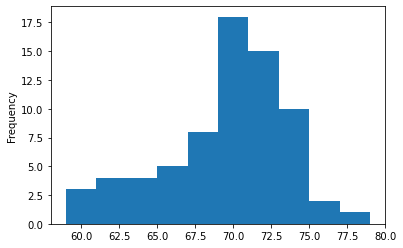

In [4]:
# Histogram
s.Height.plot.hist()

<AxesSubplot:ylabel='Density'>

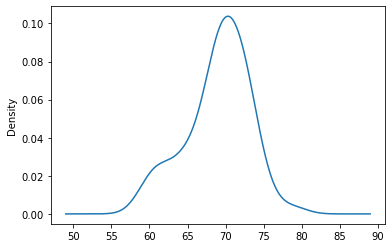

In [5]:
s.Height.plot.kde()

<span class="mark">**TODO**</span>
plot a histogram on `Age` from the survey data

<AxesSubplot:ylabel='Frequency'>

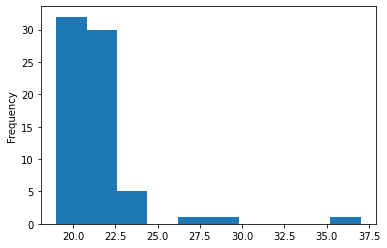

In [6]:
## Your code below
s.Age.plot.hist()

<AxesSubplot:ylabel='Frequency'>

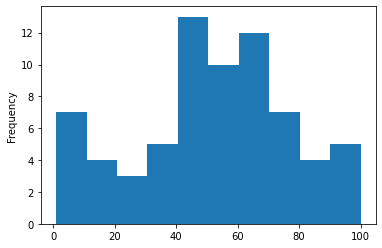

In [7]:

s.Spicy.plot.hist()

array([[<AxesSubplot:title={'center':'Years'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Born'}>,
        <AxesSubplot:title={'center':'Bedtime'}>],
       [<AxesSubplot:title={'center':'Awake'}>,
        <AxesSubplot:title={'center':'Pets'}>,
        <AxesSubplot:title={'center':'Extrovert'}>,
        <AxesSubplot:title={'center':'Cook'}>,
        <AxesSubplot:title={'center':'Spender'}>],
       [<AxesSubplot:title={'center':'Minutes'}>,
        <AxesSubplot:title={'center':'Photos'}>,
        <AxesSubplot:title={'center':'Friends'}>,
        <AxesSubplot:title={'center':'Followers'}>,
        <AxesSubplot:title={'center':'Mac'}>],
       [<AxesSubplot:title={'center':'Books'}>,
        <AxesSubplot:title={'center':'Countries'}>,
        <AxesSubplot:title={'center':'States'}>,
        <AxesSubplot:title={'center':'Homes'}>,
        <AxesSubplot:title={'center':'Temp'}>],
       [<AxesSubplot:

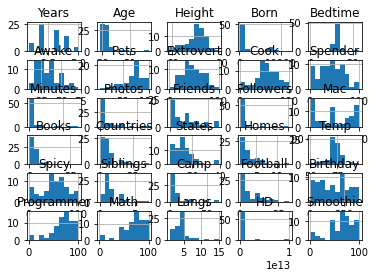

In [8]:
# Also try with
s.hist()



### Bar Chart

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html

<AxesSubplot:xlabel='Name'>

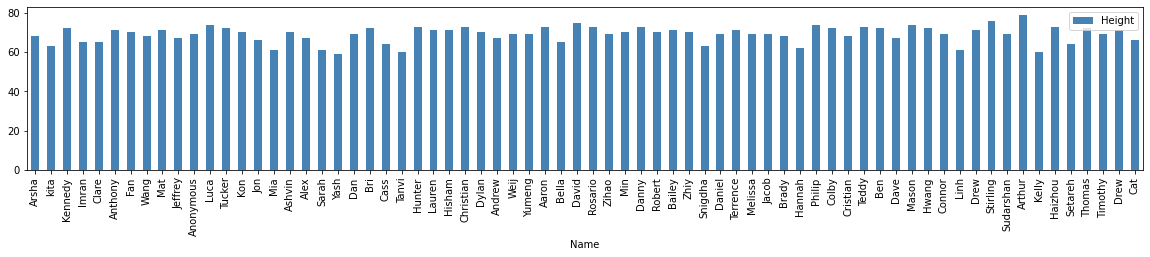

In [9]:
# Bar chart
s.plot.bar(x='Name', y='Height', figsize=(20,3), color='steelblue')
# double click on the chart to expand

#### Dataset: Data from a Social Media platform (Reddit) 
Let's practice EDA with some social media data.

CSV File containing Reddit user activity form 2004

* author: Reddit username
* num_comments : number of comments made
* num_subs: number of subreddits participated in
* karma : total Reddit score accumulated 
* controv : total number of controvertial comments ---(comments with both, high upvotes and dowsvotes)
* gild : number of comments that received Reddit gold from other users 
* verbosity: average length of the comment

In [10]:
rdata = pd.read_csv("reddit_2007_author.csv")
rdata.head()

,author,num_comments,num_subs,karma,controv,gild,verbosity
0,stesch,1192,9,4225,95,0,100.811242
1,timoleon,343,5,1095,18,0,379.903790
2,jan,43,3,85,0,0,121.046512
3,RetroRock,138,5,662,2,0,108.289855
4,joelthelion,858,6,2803,49,0,182.831002


In [11]:
type(pd.to_numeric(rdata.controv))

pandas.core.series.Series

<span class="mark">QUESTION:</span> Visually what's the difference in the histogram that you see here for Reddit versus the one you saw for height? What does it tell you about the distribution of data in both cases?

#### Plot the distribution of comments made by users. We are not interested in users who make > 200 comments.

*Hint: filter based on this condition*


<span class="mark">TODO:</span>

<AxesSubplot:ylabel='Frequency'>

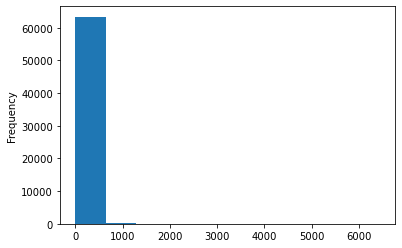

In [12]:
# Your code below.
rdata.num_comments.plot.hist()

In [13]:
# hint code: users who make more than 5000 comments.

rdata[rdata.num_comments > 5000]

,author,num_comments,num_subs,karma,controv,gild,verbosity
78,cartooncorpse,6440,7,-9253,515,0,220.189286
84,redditcensoredme,5677,5,-3981,919,0,371.153602


#### Left-skewed distribution. 
A lot of people make few comments and a few people make a lot of comments skewing the histogram. Now lets look at the distribution of top 100 num_comments

<AxesSubplot:ylabel='Frequency'>

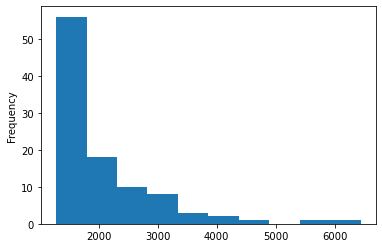

In [14]:
f1 = rdata.sort_values(by='num_comments', ascending=False).head(100)
f1.num_comments.plot.hist()

In [15]:
# who made these to comments?

f1

,author,num_comments,num_subs,karma,controv,gild,verbosity
78,cartooncorpse,6440,7,-9253,515,0,220.189286
84,redditcensoredme,5677,5,-3981,919,0,371.153602
346,bobcat,4410,8,12556,418,0,134.608390
243,newton_dave,4177,4,21308,221,0,170.344506
164,innocentbystander,4125,7,14415,513,0,470.941091
...,...,...,...,...,...,...,...
884,alaskamiller,1321,4,3564,201,0,196.081756
363,gid13,1320,4,12411,71,0,287.375758
912,Kolibri,1310,5,3365,167,0,256.396947
113,officemonkey,1302,5,6346,50,0,187.887865


### Bar chart

Plotting number of comments made by each user

<AxesSubplot:xlabel='author'>

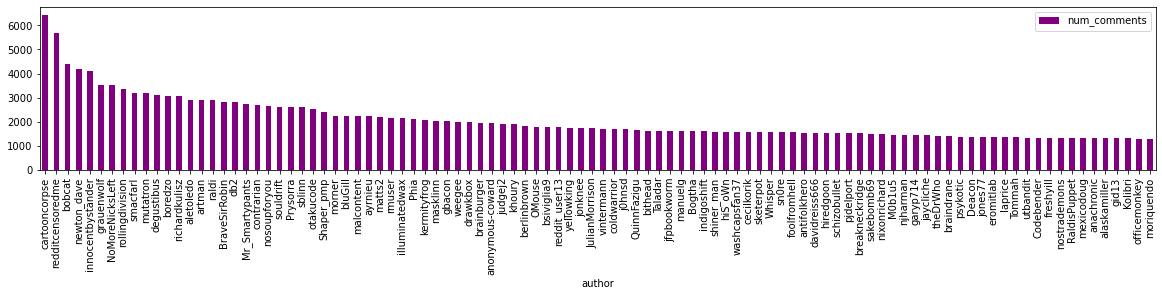

In [16]:
f1.plot.bar(x='author', y='num_comments', figsize=(20,3), color='purple')

#### I want the axes to be properly labels. Too hard to read.

Text(0, 0.5, '# of Comments')

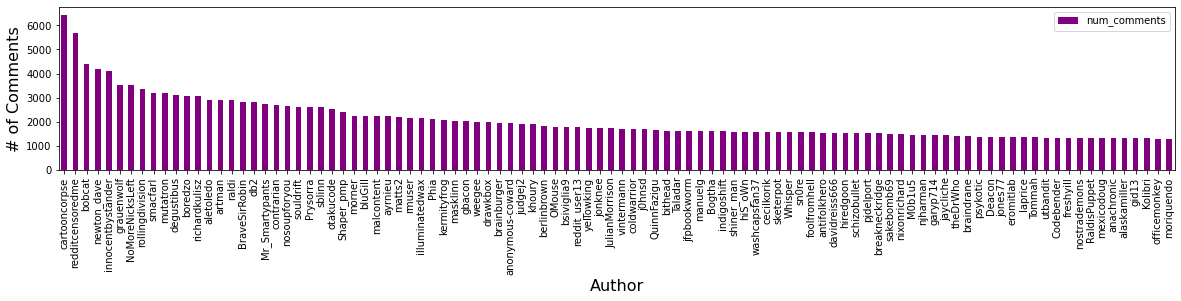

In [17]:
f1.plot.bar(x='author', y='num_comments', figsize=(20,3), color='purple')
plt.xlabel('Author', fontsize=16) # Add x & y label, change font size
plt.ylabel('# of Comments', fontsize=16)

<span class="mark">TODO</span>: The legend is too small. Can you change the size of the legend? *medium difficulty*

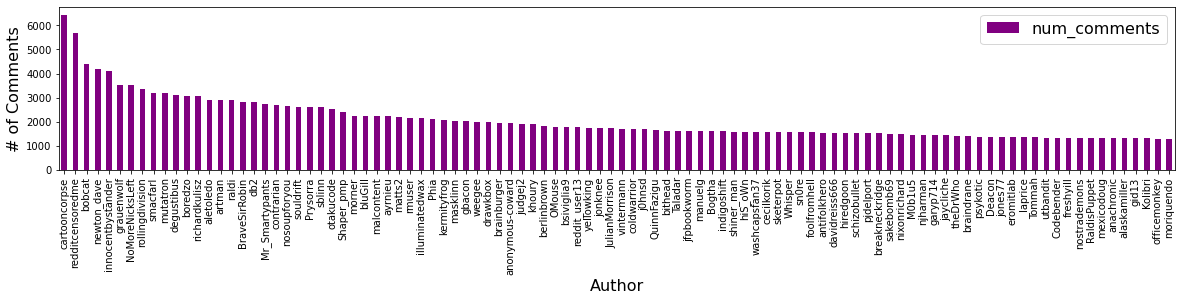

In [18]:
# Your code below

f1.plot.bar(x='author', y='num_comments', figsize=(20,3), color='purple')
plt.xlabel('Author', fontsize=16) # Add x & y label, change font size
plt.ylabel('# of Comments', fontsize=16)
plt.legend(fontsize=16)

### Scatter plot

visualizing two quantitative (continuous) variables

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html

Text(0, 0.5, 'Karma')

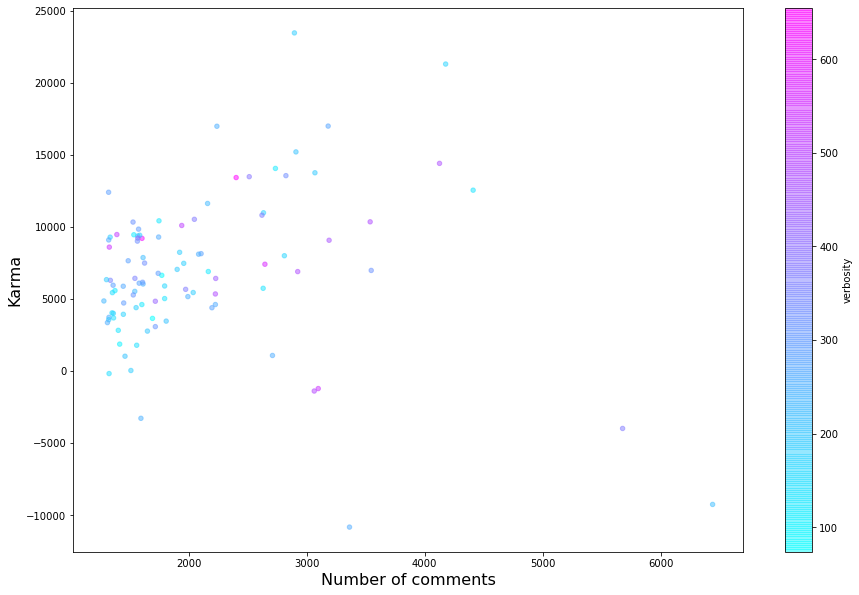

In [19]:
# How does the karma earned by the user relate to user's contribution (# of comments)?

p = f1.plot.scatter(x='num_comments', y='karma', 
                    c = 'verbosity', #color
                    colormap=plt.cm.cool, 
                    #s=rdata.controv, #marker size
                    figsize=(15,10), 
                    alpha=0.5, #between 0 (transparent) and 1 (opaque).
                    sharex=False) # sharex = convinces xlabel to show
p.set_xlabel("Number of comments", fontsize=16)
p.set_ylabel("Karma", fontsize=16)

<span class="mark">**TODO**</span>
Try now with the survey data. **2 & 3 Difficult**

* 1. scatterplot of plot age vs. height
* 2. If you are able to do 1, then also add year 'Born' on your plot to show additional information about when the person was born
* 3. If you are able to do 1 and 2, then show number of siblings as a marker size attribute

Text(0, 0.5, 'height')

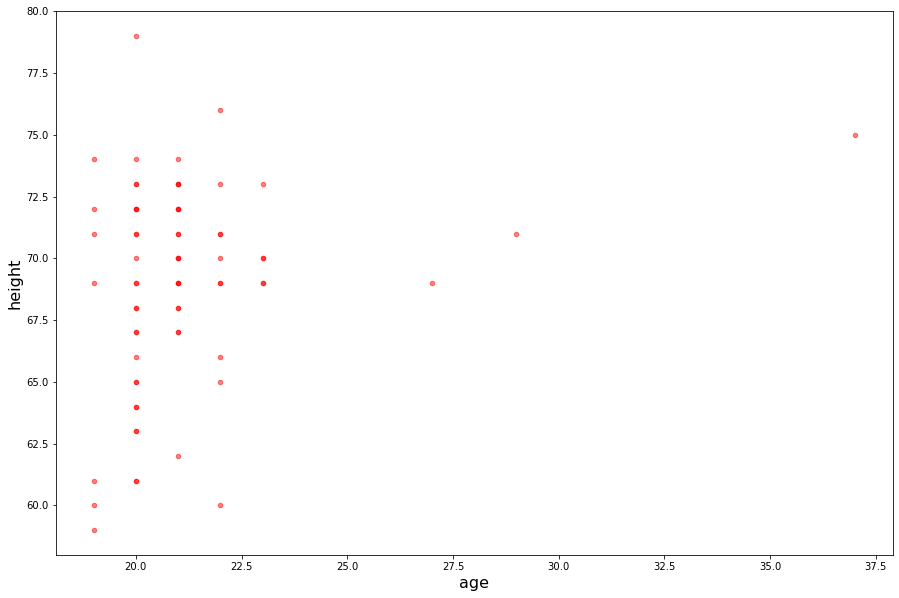

In [30]:
# Your code below

p = s.plot.scatter(x='Age', y='Height', 
                    c = 'red', #color
                    colormap=plt.cm.cool, 
                    #s=rdata.controv, #marker size
                    figsize=(15,10), 
                    alpha=0.5, #between 0 (transparent) and 1 (opaque).
                    sharex=False) # sharex = convinces xlabel to show
p.set_xlabel("age", fontsize=16)
p.set_ylabel("height", fontsize=16)

Text(0, 0.5, 'height')

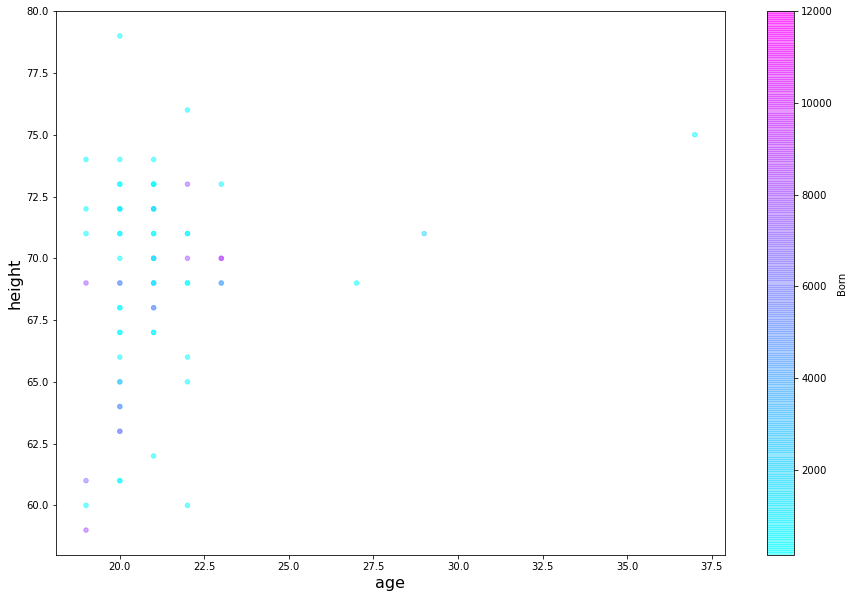

In [26]:
p = s.plot.scatter(x='Age', y='Height', 
                    c = 'Born', #color
                    colormap=plt.cm.cool, 
                    #s=rdata.controv, #marker size
                    figsize=(15,10), 
                    alpha=0.5, #between 0 (transparent) and 1 (opaque).
                    sharex=False) # sharex = convinces xlabel to show
p.set_xlabel("age", fontsize=16)
p.set_ylabel("height", fontsize=16)

Text(0, 0.5, 'height')

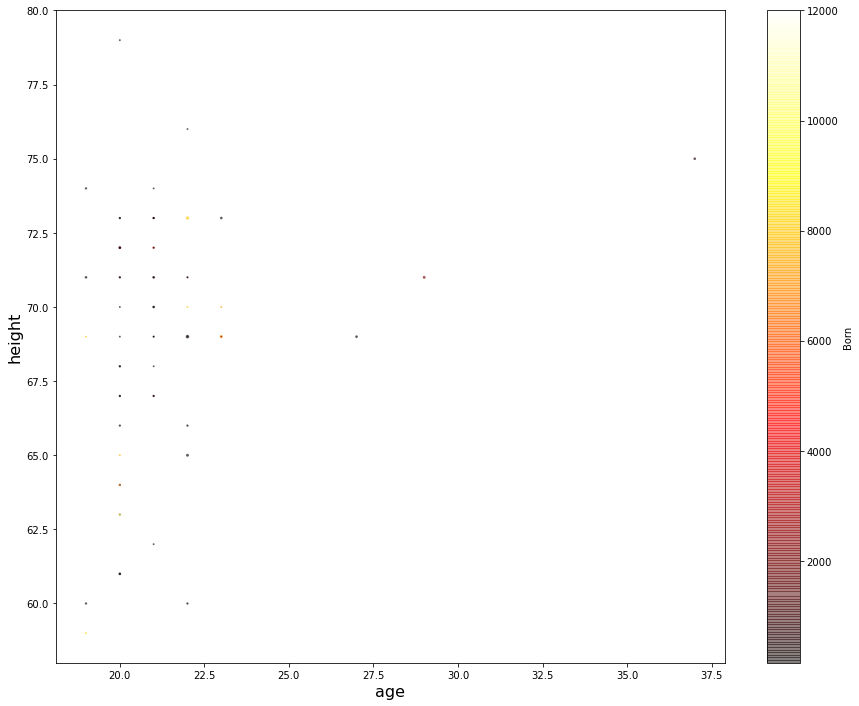

In [33]:
p = s.plot.scatter(x='Age', y='Height', 
                    c = 'Born', #color
                    colormap=plt.cm.hot, 
                    s=s.Siblings, #marker size
                    figsize=(15,12), 
                    alpha=0.5, #between 0 (transparent) and 1 (opaque).
                    sharex=False) # sharex = convinces xlabel to show
p.set_xlabel("age", fontsize=16)
p.set_ylabel("height", fontsize=16)